<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [14]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

zsh:1: command not found: wget


In [6]:
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
filename = "m4_survey_data.sqlite"

urllib.request.urlretrieve(url, filename)
print("Download complete!")

Download complete!


Connect to the database.


In [8]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [14]:
import pandas as pd

## Demo: How to run an sql query


In [22]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [24]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


### Majority of the survey responders are

In [24]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

QUERY = """
SELECT *
FROM DevType
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df_maj = pd.read_sql_query(QUERY,conn)
df_maj['DevType'].value_counts().reset_index()

,DevType,count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


## Demo: How to run a group by query


In [26]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [28]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


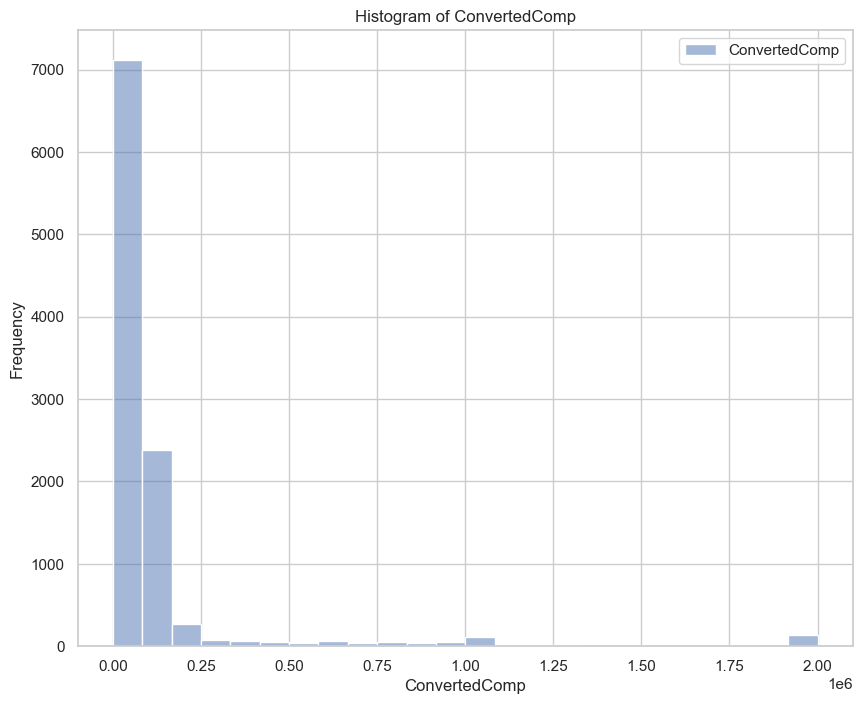

In [53]:
# your code goes here
QUERY = """select ConvertedComp from master ;"""

df_ConvertedComp = pd.read_sql_query(QUERY,conn)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize = (10,8))
sns.set(style="whitegrid")

sns.histplot(df_ConvertedComp,bins = 24)
plt.title("Histogram of ConvertedComp")
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.show()


### Box Plots


Plot a box plot of `Age.`


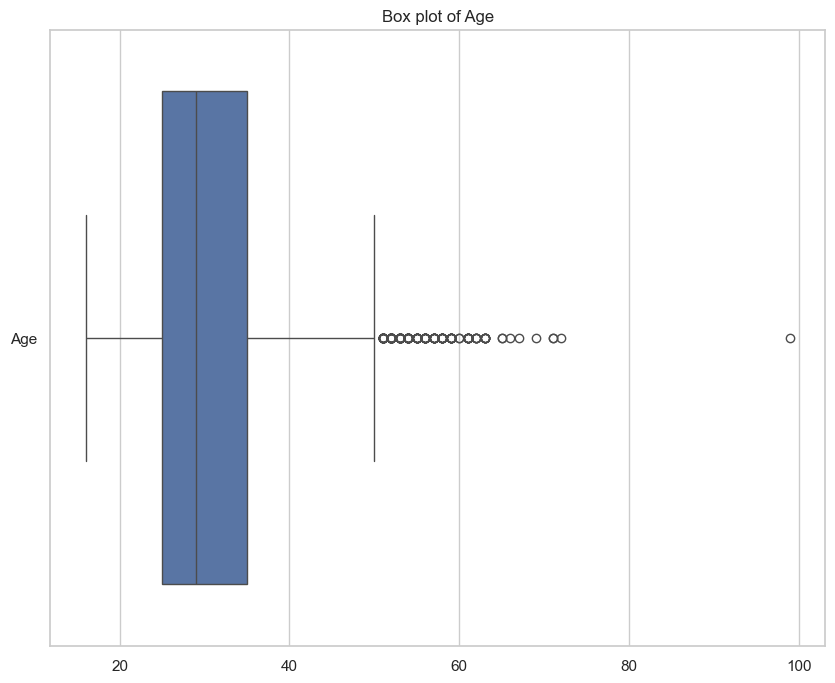

In [65]:
# your code goes here

QUERY = " SELECT Age FROM master;"

df_Age = pd.read_sql_query(QUERY,conn)

plt.figure(figsize = (10,8))
sns.set(style="whitegrid")

sns.boxplot(df_Age,orient = 'h')
plt.title("Box plot of Age")
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


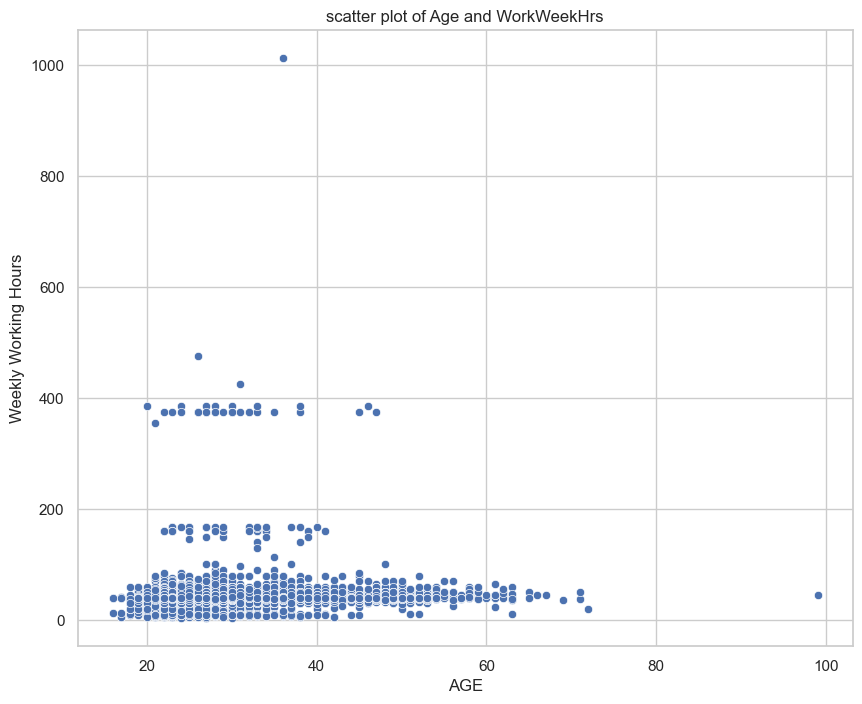

In [79]:
# your code goes here

QUERY = 'SELECT Age , WorkWeekHrs FROM master;'
df_scatter = pd.read_sql_query(QUERY,conn)

plt.figure(figsize = (10,8))
sns.set(style="whitegrid")

sns.scatterplot(data = df_scatter, x = df_scatter['Age'], y = df_scatter['WorkWeekHrs'])
plt.title("scatter plot of Age and WorkWeekHrs")
plt.xlabel('AGE')
plt.ylabel('Weekly Working Hours')
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


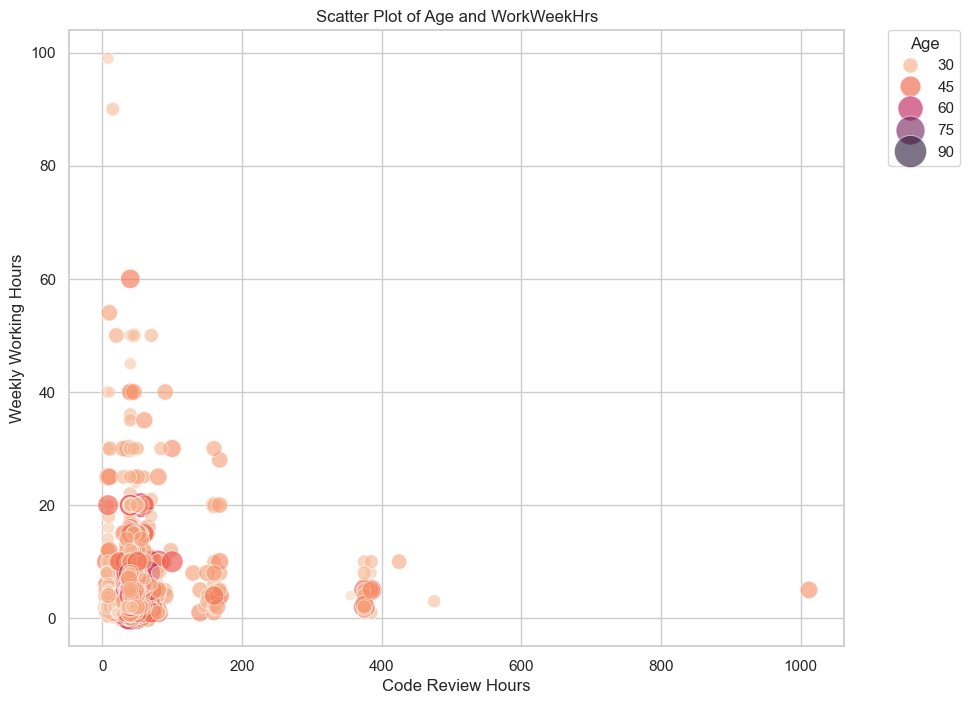

In [123]:
# your code goes here
QUERY = 'SELECT WorkWeekHrs, CodeRevHrs, Age FROM master;'
df_bubble = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

# Use `hue` parameter to color the bubbles based on Age
sns.scatterplot(data=df_bubble,
                y='CodeRevHrs',
                x='WorkWeekHrs', 
                size='Age',
                hue='Age',
                alpha=0.6,
                sizes=(20, 600), # Adjust the range of bubble sizes
                palette="rocket_r") # Set color palette

# Labels and title
plt.title("Scatter Plot of Age and WorkWeekHrs")
plt.xlabel('Code Review Hours')
plt.ylabel('Weekly Working Hours')
plt.legend(title='Age', loc='upper right', bbox_to_anchor=(1.15, 1), borderaxespad=0)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


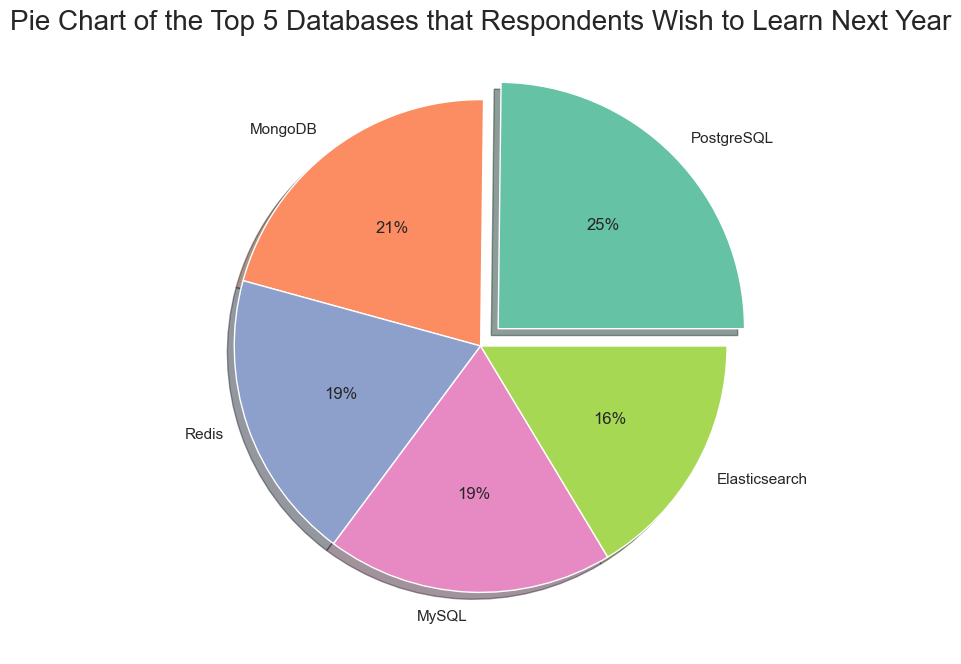

In [235]:
# your code goes here

QUERY = "SELECT * from DatabaseDesireNextYear;"

df_pie = pd.read_sql_query(QUERY,conn)
df_counts = df_pie['DatabaseDesireNextYear'].value_counts()
df_count = df_counts.head()
df_count = pd.DataFrame(df_count)
df_count.reset_index()

palette_color = sns.color_palette('Set2') 
 
# plotting data on chart 
plt.pie(df_count['count'], labels=df_count.index,explode = (0.1, 0, 0, 0, 0), colors=palette_color,autopct='%.0f%%',shadow = True) 
  
# displaying chart 
plt.title('Pie Chart of the Top 5 Databases that Respondents Wish to Learn Next Year',size = 20)
plt.show() 
                      

### 1. In the list of most popular languages respondents wish to learn next year, what is the rank of Python


In [440]:
conn = sqlite3.connect("m4_survey_data.sqlite")
QUERY = "SELECT * from LanguageDesireNextYear;"

df_lang = pd.read_sql_query(QUERY,conn)
df_lang_count = df_lang['LanguageDesireNextYear'].value_counts().reset_index()
df_lang_count.head()

,LanguageDesireNextYear,count
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


### How many respondents indicated that they currently work with 'SQL

In [443]:
QUERY = "SELECT * from LanguageWorkedWith;"

df_lang = pd.read_sql_query(QUERY,conn)
df_lang_count = df_lang['LanguageWorkedWith'].value_counts().reset_index()
df_lang_count.head()

,LanguageWorkedWith,count
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [308]:
# your code goes here
# Step 2: Plot a stacked bar chart
QUERY = '''SELECT WorkWeekHrs,CodeRevHrs,Age from master WHERE Age > 29 AND Age < 36;'''

df_stacked = pd.read_sql_query(QUERY,conn)

df_grouped = df_stacked.groupby('Age').mean()
df_grouped.reset_index(inplace = True)

df_grouped


,Age,WorkWeekHrs,CodeRevHrs
0,30.0,43.131579,4.696858
1,31.0,41.602746,4.701923
2,32.0,42.650207,5.008557
3,33.0,44.486952,4.724311
4,34.0,43.147583,4.869902
5,35.0,42.451550,4.745130


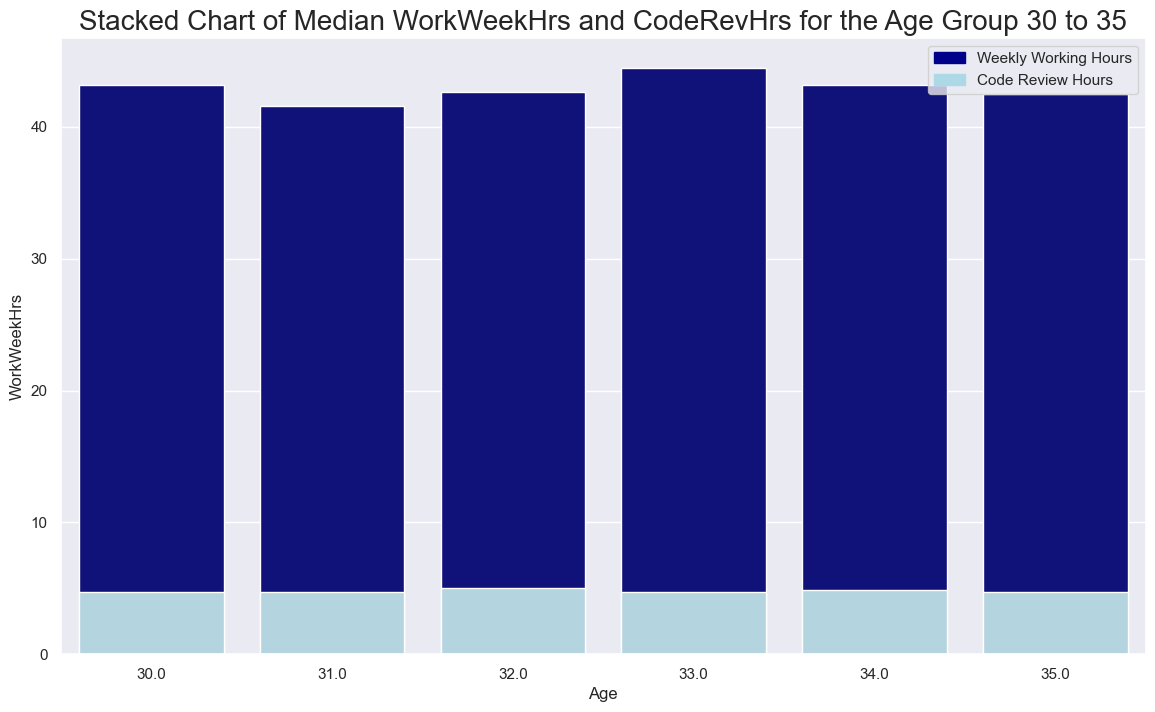

In [306]:
# Step 2: Plot a stacked bar chart
# set plot style: grey grid in the background:
sns.set_theme(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 8))

bar2 = sns.barplot(x=df_grouped['Age'],  y=df_grouped['WorkWeekHrs'], data=df_grouped, color='darkblue')

bar1 = sns.barplot(x=df_grouped['Age'], y=df_grouped['CodeRevHrs'], data=df_grouped, errorbar=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='Weekly Working Hours')
bottom_bar = mpatches.Patch(color='lightblue', label='Code Review Hours')
plt.legend(handles=[top_bar, bottom_bar])
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs for the Age Group 30 to 35',size = 20)
# show the graph
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


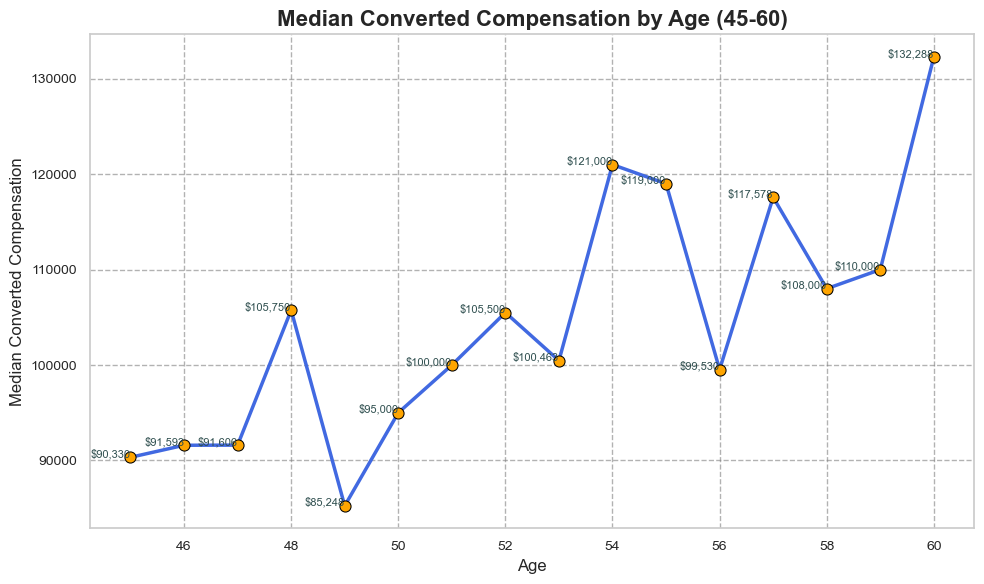

In [354]:
# your code goes here
QUERY = '''SELECT ConvertedComp , Age FROM master WHERE Age >= 45 AND Age <= 60;'''

df_line = pd.read_sql_query(QUERY,conn)
df_grouped_line = df_line.groupby('Age').median()
df_grouped_line.reset_index(inplace = True)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the line plot with markers
sns.lineplot(data=df_grouped_line, x='Age', y='ConvertedComp', marker='o', markersize=8, 
             color="royalblue", linewidth=2.5, markerfacecolor="orange", markeredgecolor="black")

# Add labels, title, and grid for clarity
plt.title("Median Converted Compensation by Age (45-60)", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Median Converted Compensation", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle="--", color="grey", alpha=0.6)

# Annotate points with the compensation values
for x, y in zip(df_grouped_line['Age'], df_grouped_line['ConvertedComp']):
    plt.text(x, y, f"${y:,.0f}", ha='right', fontsize=8, color="darkslategray")

plt.tight_layout()
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


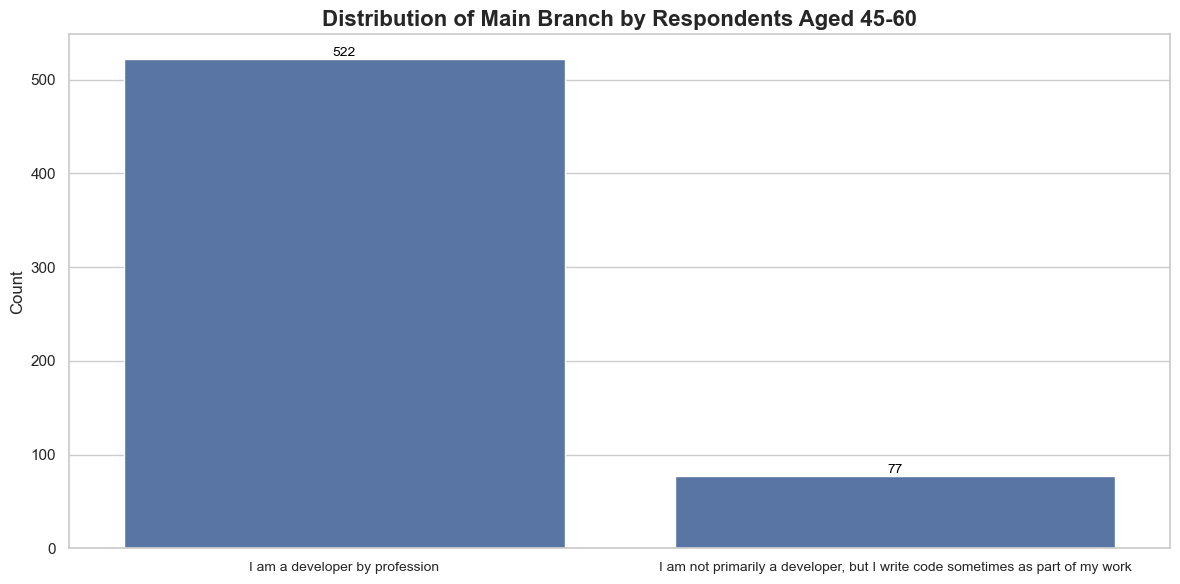

In [393]:
# your code goes here
# Count occurrences of each MainBranch for the age range 45-60
QUERY = '''SELECT MainBranch FROM master WHERE Age >= 45 AND Age <= 60;'''
df_bar = pd.read_sql_query(QUERY, conn)
df_bar_count = df_bar.value_counts().reset_index()
df_bar_count.columns = ['MainBranch', 'Count']  # Renaming columns

# Plotting
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')

# Create bar plot
sns.barplot(data=df_bar_count, x='MainBranch', y='Count')

# Enhance plot aesthetics
plt.title("Distribution of Main Branch by Respondents Aged 45-60", fontsize=16, fontweight="bold")
plt.xlabel(None)
plt.ylabel("Count", fontsize=12)
plt.xticks( fontsize=10)

# Display the count at the top of each bar
for index, row in df_bar_count.iterrows():
    plt.text(index, row['Count'], f"{row['Count']}", color='black', ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

Close the database connection.


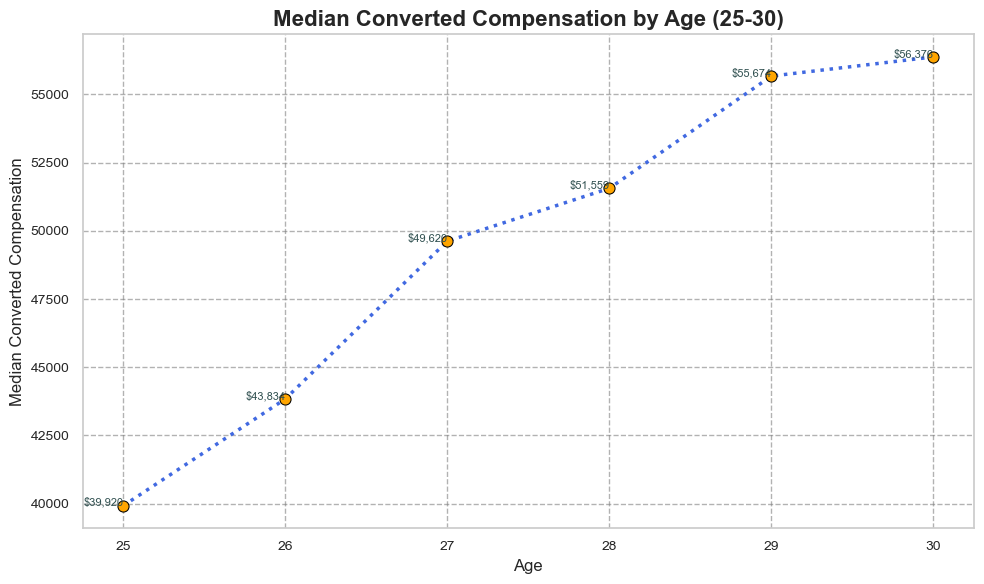

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

QUERY = '''SELECT ConvertedComp , Age FROM master WHERE Age >= 25 AND Age <= 30;'''

df_line = pd.read_sql_query(QUERY,conn)
df_grouped_line = df_line.groupby('Age').median()
df_grouped_line.reset_index(inplace = True)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the line plot with markers
sns.lineplot(data=df_grouped_line, x='Age', y='ConvertedComp', marker='o', markersize=8, 
             color="royalblue", linewidth=2.5, markerfacecolor="orange", markeredgecolor="black",linestyle = "dotted")

# Add labels, title, and grid for clarity
plt.title("Median Converted Compensation by Age (25-30)", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Median Converted Compensation", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle="--", color="grey", alpha=0.6)

# Annotate points with the compensation values
for x, y in zip(df_grouped_line['Age'], df_grouped_line['ConvertedComp']):
    plt.text(x, y, f"${y:,.0f}", ha='right', fontsize=8, color="darkslategray")

plt.tight_layout()
plt.show()

In [37]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
